## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [3]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [4]:
df = pd.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [5]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [6]:
df.tail()

,DATE,TAG,POSTS
2798,2025-05-01 00:00:00,php,268
2799,2025-05-01 00:00:00,python,1587
2800,2025-05-01 00:00:00,r,317
2801,2025-05-01 00:00:00,ruby,29
2802,2025-05-01 00:00:00,swift,210


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [7]:
df.shape

(2803, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [8]:
df.count()

DATE     2803
TAG      2803
POSTS    2803
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [12]:
df.groupby(["TAG"]).sum().sort_values("POSTS", ascending=False)

,DATE,POSTS
TAG,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2530058
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2210699
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1919433
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1624521
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1466755
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,814325
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,510808
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,407848
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,336419


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [14]:
df.groupby("TAG").count().sort_values("DATE")

,DATE,POSTS
TAG,,
go,187,187
swift,193,193
r,200,200
assembly,202,202
java,202,202
delphi,202,202
c++,202,202
c,202,202
python,202,202


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [15]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [16]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


In [17]:
df.tail()

,DATE,TAG,POSTS
2798,2025-05-01,php,268
2799,2025-05-01,python,1587
2800,2025-05-01,r,317
2801,2025-05-01,ruby,29
2802,2025-05-01,swift,210


## Data Manipulation



In [18]:
reshaped_df = df.pivot(index='DATE',columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [19]:
reshaped_df.shape

(203, 14)

In [20]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [21]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,319.0,1638.0,752.0,104.0,NaN,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,NaN
2008-10-01,16.0,302.0,1983.0,804.0,112.0,NaN,1143.0,720.0,128.0,602.0,504.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,952.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


In [22]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2025-01-01,68.0,320.0,1126.0,686.0,56.0,133.0,1153.0,1410.0,25.0,508.0,2680.0,521.0,50.0,340.0
2025-02-01,60.0,275.0,980.0,575.0,58.0,96.0,917.0,1130.0,15.0,344.0,2164.0,499.0,50.0,303.0
2025-03-01,60.0,307.0,914.0,679.0,53.0,97.0,889.0,1120.0,16.0,331.0,2212.0,485.0,46.0,296.0
2025-04-01,49.0,205.0,646.0,515.0,37.0,64.0,792.0,785.0,15.0,253.0,1727.0,400.0,31.0,215.0
2025-05-01,38.0,215.0,586.0,490.0,35.0,65.0,668.0,720.0,16.0,268.0,1587.0,317.0,29.0,210.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [23]:
reshaped_df.count()

TAG
assembly      202
c             202
c#            203
c++           202
delphi        202
go            187
java          202
javascript    202
perl          202
php           202
python        202
r             200
ruby          202
swift         193
dtype: int64

In [24]:
reshaped_df.fillna(0, inplace=True) 

In [25]:
reshaped_df.count()

TAG
assembly      203
c             203
c#            203
c++           203
delphi        203
go            203
java          203
javascript    203
perl          203
php           203
python        203
r             203
ruby          203
swift         203
dtype: int64

In [26]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,319.0,1638.0,752.0,104.0,0.0,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,0.0
2008-10-01,16.0,302.0,1983.0,804.0,112.0,0.0,1143.0,720.0,128.0,602.0,504.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,952.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


In [27]:
reshaped_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
import matplotlib.pyplot as plt

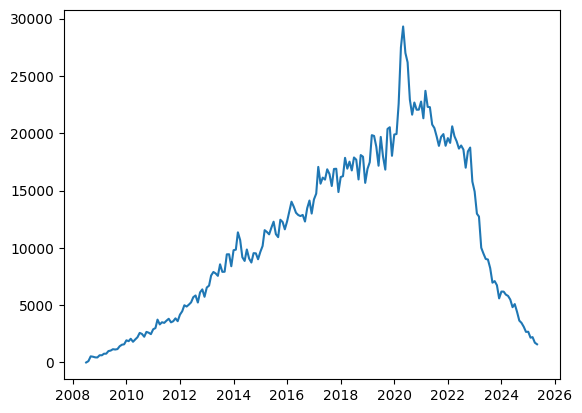

In [36]:
plt.plot(reshaped_df.index, reshaped_df['python'])

Text(0.5, 1.0, 'Popularity of Java programming language')

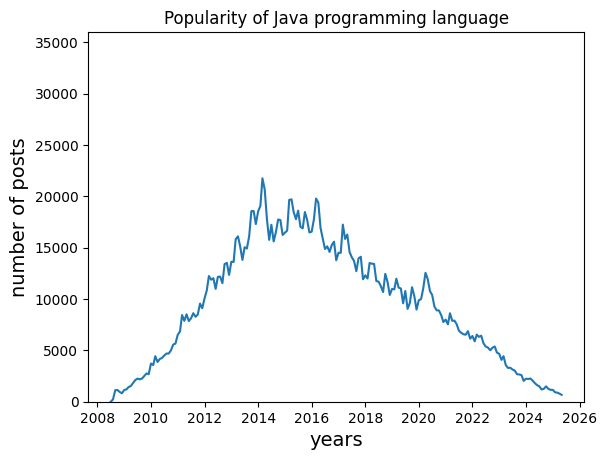

In [38]:
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.xlabel("years",fontsize=14)
plt.ylabel("number of posts",fontsize=14)
plt.ylim(0, 36000)
plt.title("Popularity of Java programming language")

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

<Figure size 1600x1000 with 0 Axes>

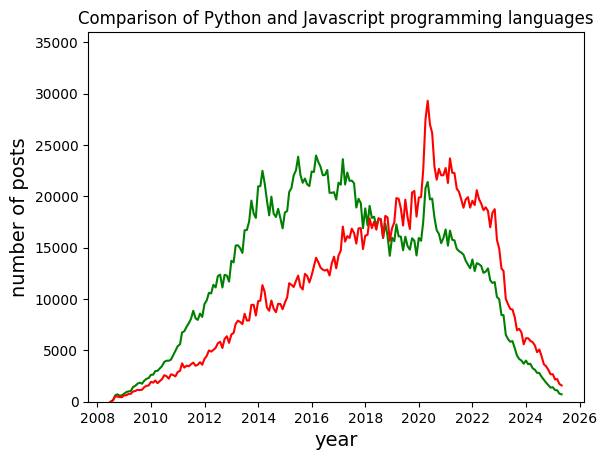

<Figure size 1600x1000 with 0 Axes>

In [46]:
plt.plot(reshaped_df.index, reshaped_df['javascript'], color="green", label="javascript")
plt.plot(reshaped_df.index, reshaped_df['python'], color="red", label="python")
plt.xlabel("year",fontsize=14)
plt.ylabel("number of posts",fontsize=14)
plt.ylim(0, 36000)
plt.title("Comparison of Python and Javascript programming languages")
plt.figure(figsize=(16,10))

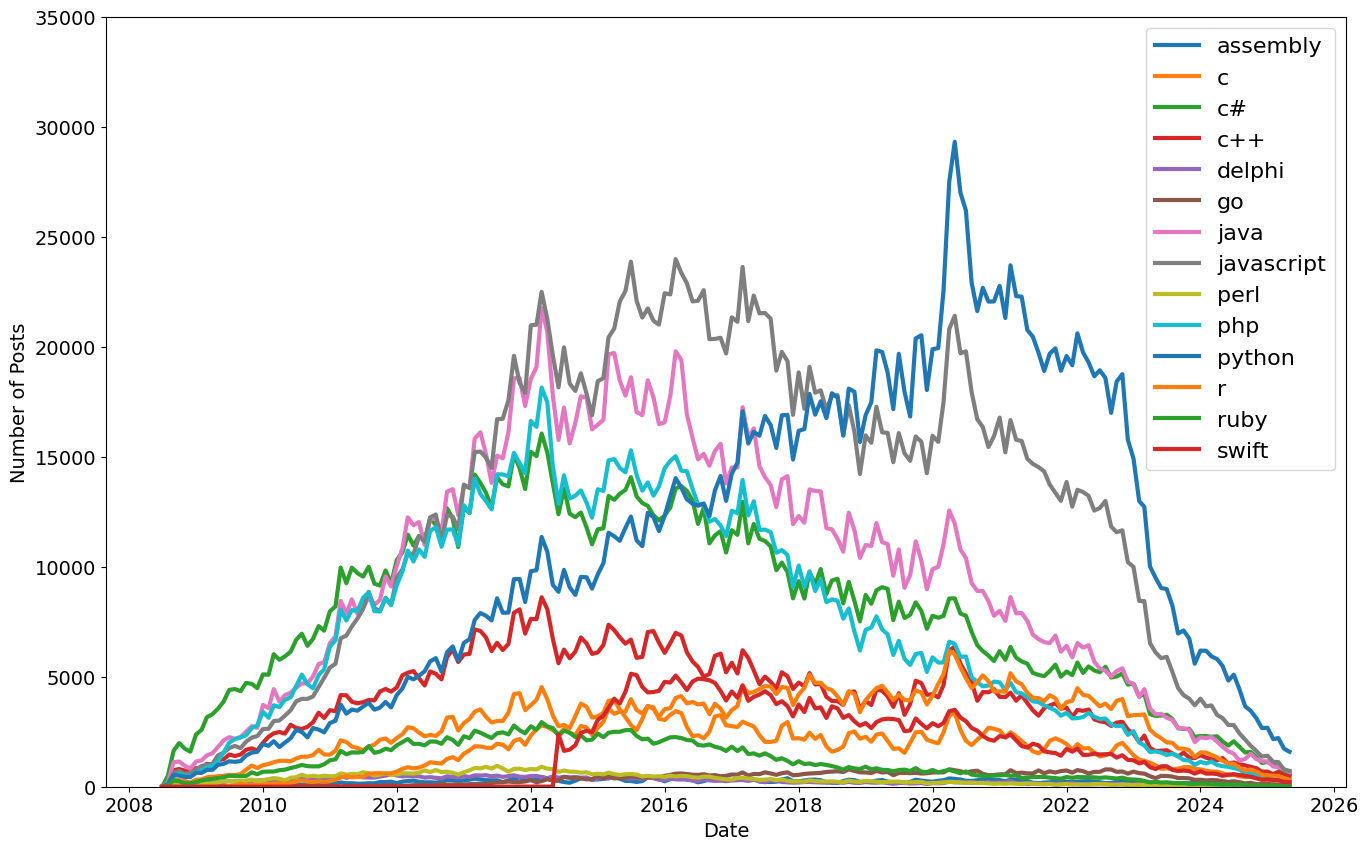

In [47]:
    plt.figure(figsize=(16,10))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Posts', fontsize=14)
    plt.ylim(0, 35000)
     
    for column in reshaped_df.columns:
        plt.plot(reshaped_df.index, reshaped_df[column], 
                 linewidth=3, label=reshaped_df[column].name)
     
    plt.legend(fontsize=16) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [60]:
roll_df = reshaped_df.rolling(window=12).mean()

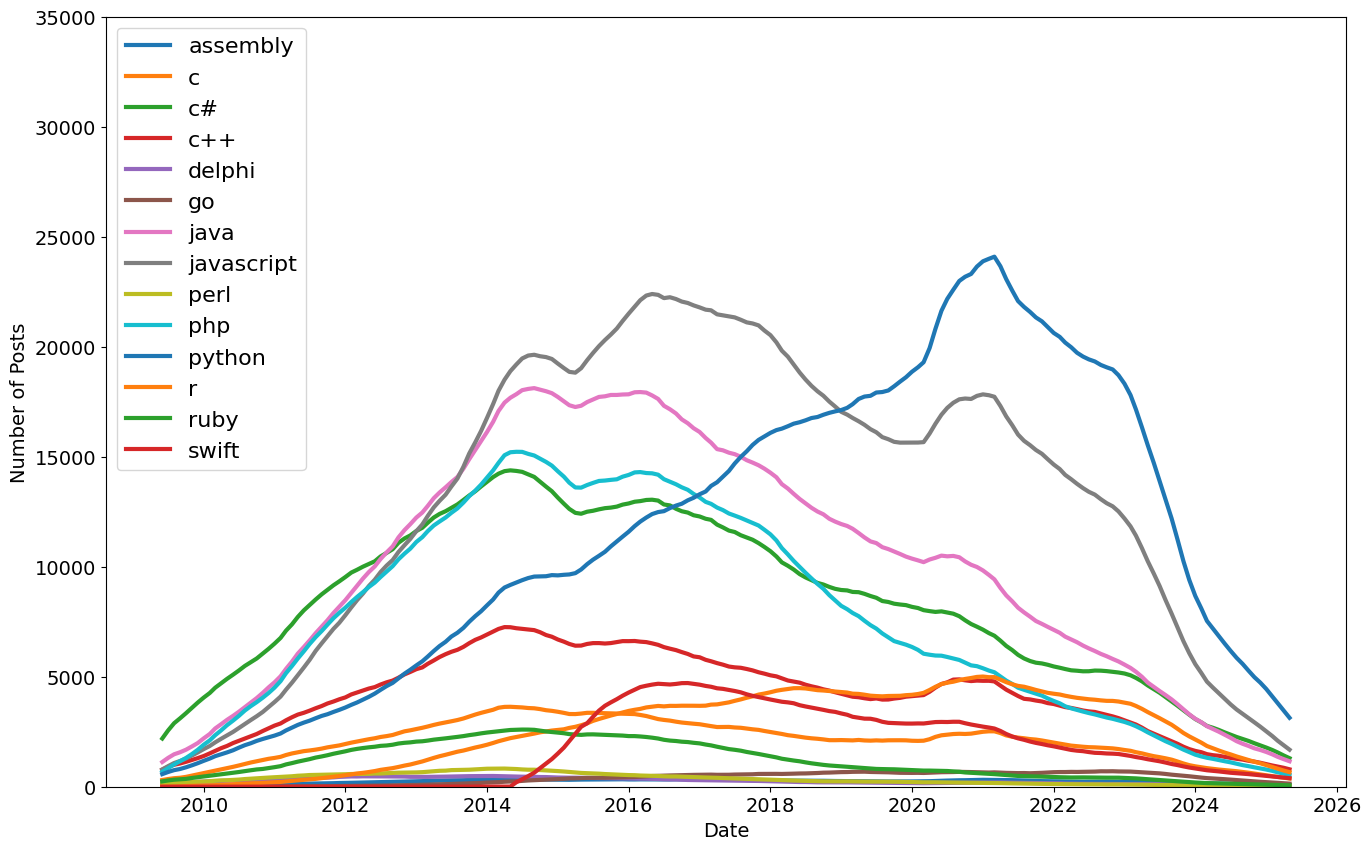

In [61]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
        linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)